# Explore here

# Predecir el coste del seguro médico de una persona.

Importación de las librerías necesarias

In [2]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para trazar gráficos:
import matplotlib.pyplot as plt

# Librería para el escalado de varibles, asegurando mismo rango (0 a 1):
from sklearn.preprocessing import MinMaxScaler

# Librería codificar variables categóricas a numéricas:
from sklearn.preprocessing import LabelEncoder

# Librería para generar un modelo de Regresión Lineal: 
import statsmodels.api as sm

# Librería para poder realizar la partición del conjunto de datos:
from sklearn.model_selection import train_test_split

## **Paso 1. Lectura de datos.**
Lo primero que haremos será leer y guardar en una variable la información para trabajar con ella.

Para ello, se ha guaradado el archivo con todos los datos en la ruta:https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv y se ha cargado en un Data Frame:

In [24]:
# Importamos el archivo e imprimimos las primeras filas del dataframe para tener una visión rápida del conjunto
data_med = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

# Se muestran las 5 primeras filas del Data Frame
data_med.head()

# Recurrimos al atributo shape para describir la información que contiene:
print (f" El conjunto de datos cuenta con información de {data_med.shape[0]} beneficiarios, con un total de {data_med.shape[1]} datos característicos de cada uno de ellos.")



 El conjunto de datos cuenta con información de 1338 beneficiarios, con un total de 7 datos característicos de cada uno de ellos.


En esta parte es importante tener claro el significado de todos los campos:
- age. Edad del beneficiario principal (numérico)
- sex. Género del beneficiario principal (categórico)
- bmi. índice de masa corporal (numérico)
- children. Número de niños/dependientes cubiertos por un seguro médico (numérico)
- smoker. ¿Es fumador? (categórico)
- region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
- charges. Prima del seguro médico (numérico)

In [18]:
# Descripción general del DataFrame
data_med.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- En esta parte concluímos que no existen valores nulos en ningún campo
- Nos encontramos con 3 variables categóricas y 4 numéricas

In [20]:
# Estadísticas descriptivas básicas
data_med.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## **Paso 2. Limpieza de datos**

### **Paso 2.1 - Análisis de Duplicados y Constantes:**
Uno de los puntos críticos a la hora de realizar un análisis, es la existencia de variables / características comunes a todos los clientes, dado que sería información redundante y no aportaría valor al estudio, es decir, el análisis sería el mismo aunque no estuviesen como variables y, por lo tanto, se podría prescindir de ellas.

In [26]:
# Se utiliza el método .nunique() para saber la cantidad de columnas con constantes en el Data Frame:
print(f" Hay un total de {(lambda data_med: (data_med.nunique() == 1).sum())(data_med)} columnas en el Data Frame con un valor constante para todos los clientes.");

# Se imprime el conteo de valores distintos en cada columna:
print (f" \nPara cada columna del Data Frame, se muestran cuántos valores distintos presentan:");
data_med.nunique()

 Hay un total de 0 columnas en el Data Frame con un valor constante para todos los clientes.
 
Para cada columna del Data Frame, se muestran cuántos valores distintos presentan:


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

A partir del resultado obtenido, se puede observar que no hay ninguna constante en los datos cargados, por lo tanto, no hay que eliminar ninguna columna, de momento.

Otro factor determinante a la hora de realizar una limpieza de los datos es detectar si hay datos repetidos, aplicado a este caso, si hay clientes duplicados.

In [27]:
# Se utiliza el método .duplicated() para identificar los valores repetidos dentro del DataFrame:
print(f" Hay un total de {data_med.duplicated().sum()} clientes duplicados.")

 Hay un total de 1 clientes duplicados.


In [30]:
# Al existir duplicados los visualizamos:
duplicados = data_med.duplicated(keep=False)
filas_duplicadas = data_med[duplicados]
filas_duplicadas


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [31]:
# Finalmente eliminamos los duplicados:
data_bank = data_med.drop_duplicates()
data_bank.shape

(1337, 7)

## **Paso 3. Graficado de variables.**

### **Paso 3.1 Análisis de variables individuales numéricas** 

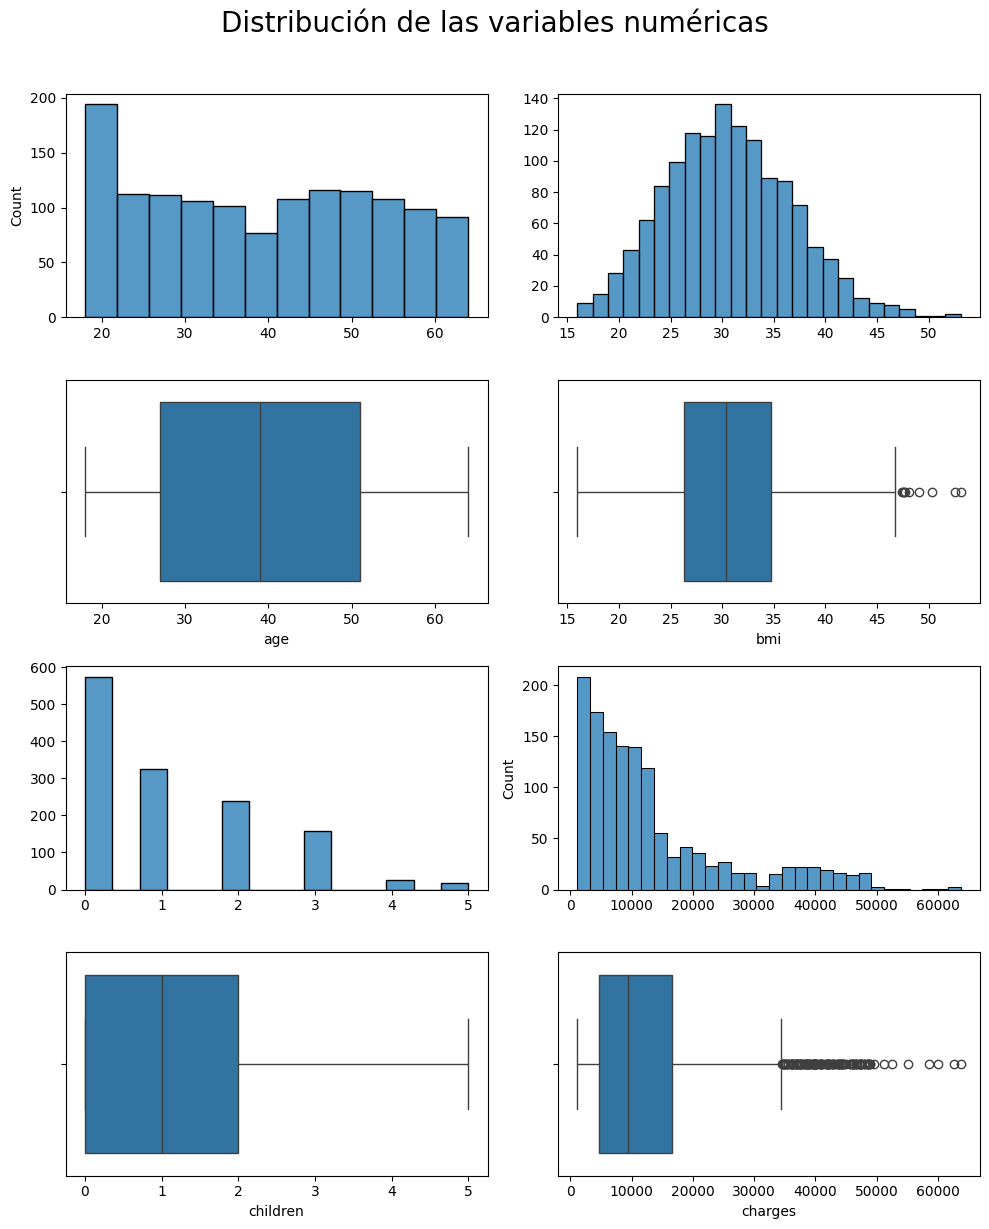

In [35]:
# Crear una figura con los histogramas y diagramas de caja
fig, axis = plt.subplots(4, 2, figsize=(10, 12))

# Añadir un título global al conjunto de subplots
fig.suptitle("Distribución de las variables numéricas", fontsize=20, y=1.02)

# Creanos los múltiples histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=data_med, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=data_med, x="age")
sns.histplot(ax=axis[0, 1], data=data_med, x="bmi").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=data_med, x="bmi")
sns.histplot(ax=axis[2, 0], data=data_med, x="children").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 0], data=data_med, x="children")
sns.histplot(ax=axis[2, 1], data=data_med, x="charges").set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=data_med, x="charges")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

De las anteriores gráficas leemos:
- La media de edad se sitúa en torno a los 40 años. Abarcando desde los 27 a los 52 años aproximádamente.
- El BMI (índice de masa corporal) se encuentra del 25 al 35 encontrándonos con valores outlaiers en esta grafica.
- La mayoría de beneficiarios no tienen hijos. Aunque si sumamos todos los beneficiarios que tienen 1, 2, 3  o más hijos sobrepasan a los que no tienen ninguno.
- La prima se sitúa en los 10.000 de media pero existen muchos outlaiers en esta gráfica por encima de los 30.000 y superando incluso los 60.000


### **Paso 3.2 Análisis de variables individuales categóricas** 

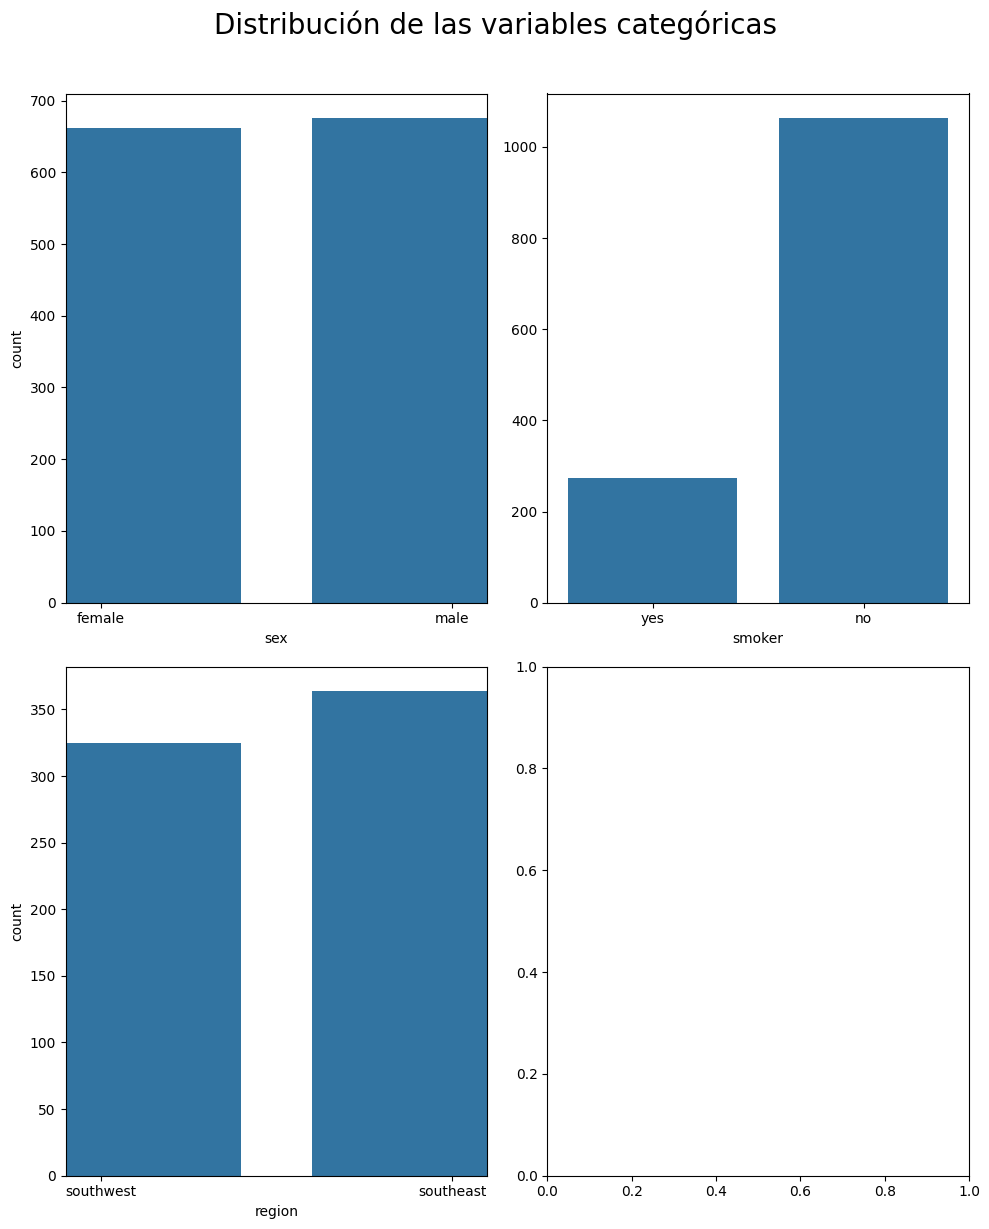

In [37]:
fig, axis = plt.subplots(2, 2, figsize = (10, 12))

# Añadir un título global al conjunto de subplots
fig.suptitle("Distribución de las variables categóricas", fontsize=20, y=1.02)

# Generamos gráficos de barras para visualizar las variables categóricas.
sns.countplot(ax = axis[0, 0], data = data_med, x = "sex").set_xlim(-0.1, 1.1)
sns.countplot(ax = axis[0, 1], data = data_med, x = "smoker").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = data_med, x = "region").set_xlim(-0.1, 1.1)



# Ajustar el layout y título
plt.tight_layout()


# Mostrar el plot
plt.show()

- La distribución de beneficiarios es prácticamente simétrica tanto en sexo como en region.
- Donde si existe una gran diferencia es en fumadores, donde más del 80% son **no fumadores**.

### **Paso 3.3 Análisis de 2 variables en conjunto** 

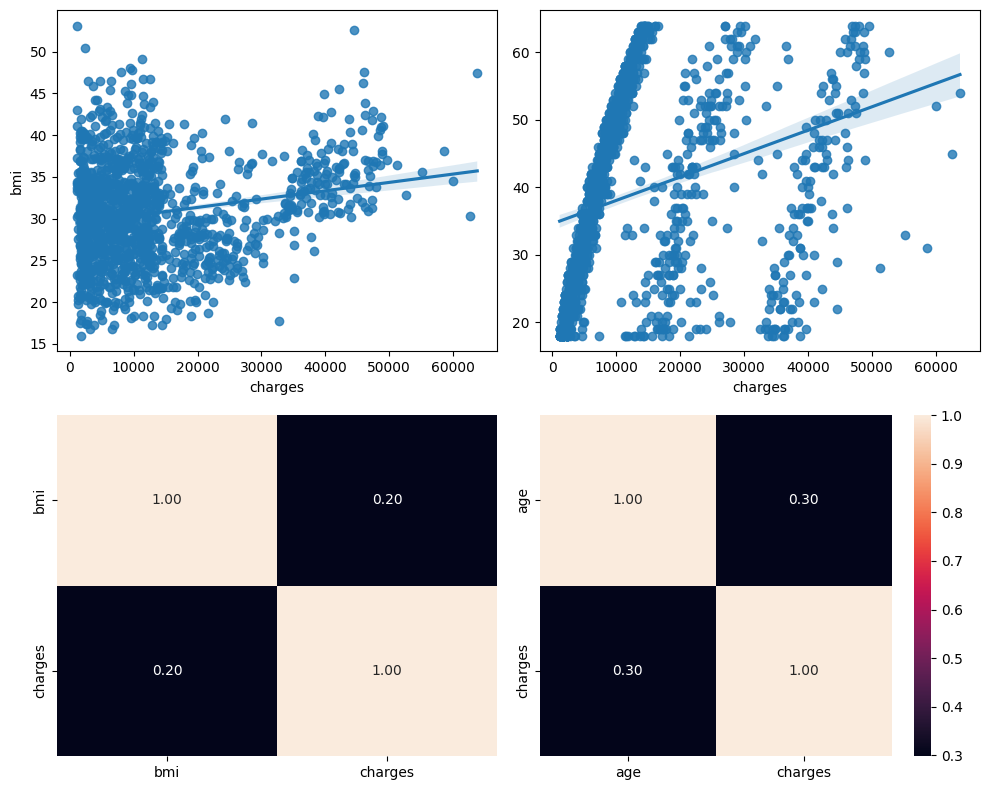

In [42]:
# Creamos la figura para los diagramas
fig, axis = plt.subplots(2, 2, figsize = (10, 8))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_med, x = "charges", y = "bmi")
sns.heatmap(data_bank[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_med, x = "charges", y = "age").set(ylabel=None)
sns.heatmap(data_bank[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()